In [1]:
%autosave 0

Autosave disabled


# 국가교통 데이터 오픈마켓
- https://www.diamond-e.kr/
## 포항시 관련 공공데이터
- https://www.diamond-e.kr/frn/prdt/search?query=포항시
- 게시물 "모두" 선택 구매 후 다운

# 데이터 찾기 및 확인 사항
- 데이터 제공 url 카피
- 데이터 이름
- 데이터 제공하는 곳
- 데이터 제공방식
- 샘플 데이터
- 영문 데이터 --> 함께 제공되는 메타 데이터로 변환해야함

In [2]:
#파일 읽어들이기
import pandas as pd
df_temp = pd.DataFrame()
col_name = ["on_date","off_date","route_name","descr",
            "age_type","trans_yn","addfee_yn","start_bstop","end_bstop"]
for i in range(0, 100):
    file_path = "./포항시_버스_사용자_교통카드_사용_내역/trfcard ({})/trfcard.csv".format(i)
    df = pd.read_csv(file_path, header=0)
    df_temp = pd.concat([df_temp, df], ignore_index=True)
df_sort = df_temp.sort_values(by=df_temp.columns[0], 
                              ascending=True, 
                              ignore_index=True)
df_sort

,on_date,off_date,route_name,descr,age_type,trans_yn,addfee_yn,start_bstop,start_gps_x,start_gps_y,end_bstop,end_gps_x,end_gps_y
0,20200101051548,20200101051952,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
1,20200101051548,20200101051952,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
2,20200101051559,20200101053452,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,시외버스터미널,129.350580,36.013250
3,20200101051559,20200101053452,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,시외버스터미널,129.350580,36.013250
4,20200101051603,20200101053427,175,문덕-고속터미널-선린병원-달전,일반,N,N,국민빌라,129.402976,35.957476,해병대서문,129.413868,35.975902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057867,20200331233806,20200331234546,107,문덕-시외(고속)터미널-흥해,일반,N,N,대동우방아파트,129.360209,36.050494,상대시장,129.361983,36.019438
1057868,20200331234833,20200331235954,175,문덕-고속터미널-선린병원-달전,일반,N,N,해병대서문,129.413196,35.977037,부영사랑3차,129.402238,35.973022
1057869,20200331234833,20200331235954,175,문덕-고속터미널-선린병원-달전,일반,N,N,해병대서문,129.413196,35.977037,부영사랑3차,129.402238,35.973022
1057870,20200331235643,20200401000408,102,문덕-남구청-고속터미널-북구보건소-양덕,일반,N,N,해병대서문,129.413196,35.977037,문덕사거리,129.402914,35.962293


In [3]:
len(df_sort.columns)

13

In [4]:
df_col = pd.read_excel("./포항시_버스_사용자_교통카드_사용_내역/trfcard (0)/trfcard_columns.xlsx",
                      header=2,
                      usecols="C")
col_list = df_col["컬럼명 (한글)"].values.tolist()
col_list

['승차시각',
 '하차시각',
 '노선명',
 '노선설명',
 '승객연령',
 '환승여부',
 '추가운임여부',
 '승차정류장',
 '승차정류장 GPS X',
 '승차정류장 GPS Y',
 '하차정류장',
 '하차정류장 GPS X',
 '하차정류장 GPS Y']

In [5]:
df_sort.columns = col_list
df_sort.head(5)

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y
0,20200101051548,20200101051952,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
1,20200101051548,20200101051952,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675
2,20200101051559,20200101053452,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,시외버스터미널,129.350580,36.013250
3,20200101051559,20200101053452,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,시외버스터미널,129.350580,36.013250
4,20200101051603,20200101053427,175,문덕-고속터미널-선린병원-달전,일반,N,N,국민빌라,129.402976,35.957476,해병대서문,129.413868,35.975902


In [6]:
for col in col_list:
    df_sort.astype({ col :"str"})
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057872 entries, 0 to 1057871
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   승차시각         1057872 non-null  int64  
 1   하차시각         1057872 non-null  int64  
 2   노선명          1057872 non-null  object 
 3   노선설명         1057872 non-null  object 
 4   승객연령         1057872 non-null  object 
 5   환승여부         1057872 non-null  object 
 6   추가운임여부       1057872 non-null  object 
 7   승차정류장        1057872 non-null  object 
 8   승차정류장 GPS X  1057872 non-null  float64
 9   승차정류장 GPS Y  1057872 non-null  float64
 10  하차정류장        1057872 non-null  object 
 11  하차정류장 GPS X  1057872 non-null  float64
 12  하차정류장 GPS Y  1057872 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 104.9+ MB


In [7]:
df_sort["월"] = (df_sort["승차시각"] // 100000000) - 202000
df_sort["일"] = (df_sort["승차시각"] // 1000000) % 100
df_sort.head(2)
"""
mm_list = []
dd_list = []
for i in range(0, len(df_sort)):
    mm = str(df_sort["승차시각"][i])[4:6]
    dd = str(df_sort["승차시각"][i])[6:8]
    mm_list.append(mm)
    dd_list.append(dd)
df_sort["월"] = mm_list
df_sort["일"] = dd_list
df_sort.head(1)
"""

'\nmm_list = []\ndd_list = []\nfor i in range(0, len(df_sort)):\n    mm = str(df_sort["승차시각"][i])[4:6]\n    dd = str(df_sort["승차시각"][i])[6:8]\n    mm_list.append(mm)\n    dd_list.append(dd)\ndf_sort["월"] = mm_list\ndf_sort["일"] = dd_list\ndf_sort.head(1)\n'

In [8]:
df_pivot = df_sort.pivot_table(index="월", 
                                 columns="일", 
                                 values="승차정류장", 
                                 aggfunc="count")
df_final = df_pivot.fillna(0)
df_final

일,1,2,3,4,5,6,7,8,9,10,...,21,22,24,25,26,27,28,29,30,31
월,,,,,,,,,,,,,,,,,,,,,
1,18738.0,16185.0,16614.0,12556.0,19054.0,15494.0,25976.0,15808.0,16788.0,0.0,...,17324.0,34494.0,9125.0,0.0,15562.0,5472.0,0.0,16046.0,31784.0,16202.0
2,11810.0,8547.0,0.0,15507.0,44757.0,0.0,15715.0,34113.0,0.0,31194.0,...,9084.0,5657.0,5938.0,4477.0,10694.0,5422.0,5491.0,3758.0,0.0,0.0
3,2402.0,6545.0,28485.0,11956.0,5830.0,12304.0,4114.0,2827.0,0.0,5345.0,...,0.0,0.0,0.0,131.0,2897.0,4983.0,3875.0,2484.0,0.0,4992.0


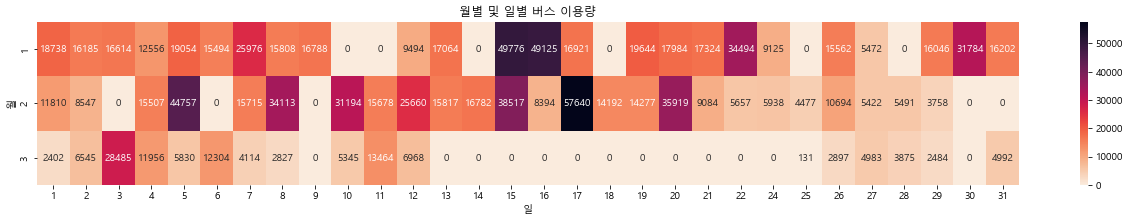

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns
plt.rc("font", family="Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(22, 3))
sns.heatmap(df_final, annot=True, fmt=".0f", cmap="rocket_r")
plt.title("월별 및 일별 버스 이용량")
plt.show()

# 승하차 정류장별 체류시간(분) 상위 30건 분석 비교

In [10]:
# timedelta 안쓰는 방법

h_start = ((df_sort["승차시각"] // 10000)%100)
h_end = ((df_sort["하차시각"] // 10000)%100).replace(0, 24)

m_start = ((df_sort["승차시각"] // 100)%100)
m_end = ((df_sort["하차시각"] // 100)%100)

s_start = (df_sort["승차시각"] % 100)
s_end = (df_sort["하차시각"] % 100)

(h_end - h_start) * 3600

0             0
1             0
2             0
3             0
4             0
           ... 
1057867       0
1057868       0
1057869       0
1057870    3600
1057871    3600
Length: 1057872, dtype: int64

## 아래 함수 활용해서 체류시간, 체류시간(s) 2가지 column을 추가

In [29]:

from datetime import timedelta
dif_list = []

for i in range(0, len(df_sort)):
    h_start = int(str(df_sort["승차시각"][i])[8:10])
    h_end = int(str(df_sort["하차시각"][i])[8:10])
    if h_end == 0:
        h_end = 24

    m_start = int(str(df_sort["승차시각"][i])[10:12])
    m_end = int(str(df_sort["하차시각"][i])[10:12])

    s_start = int(str(df_sort["승차시각"][i])[12:14])
    s_end = int(str(df_sort["하차시각"][i])[12:14])

    end_time = timedelta(hours=h_end, minutes=m_end, seconds = s_end)
    start_time = timedelta(hours=h_start, minutes=m_start, seconds = s_start)

    dif_time = end_time - start_time
    a = dif_time.seconds # timedelta에서 사용되는 메서드인 .seconds 를 사용
    dif_list.append(a)
    
len(dif_list)

1057872

In [30]:
df_sort["체류시간(s)"] = dif_list

In [31]:
# 개인별 체류시간 top30
df_sort.sort_values(by="체류시간", ascending=False).head(30)

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,월,일,체류시간,승차-하차정류장,체류시간(s)
21331,20200102092326,20200102105325,175,문덕-고속터미널-선린병원-달전,일반,Y,N,남구보건소,129.396855,35.992624,오천농협,129.402810,35.970003,1,2,1:29:59,남구보건소-오천농협,5399
842061,20200219112451,20200219125450,131,양덕-송도-시청-양학-양덕,일반,Y,N,양덕차고지,129.401693,36.077258,양덕차고지,129.401693,36.077258,2,19,1:29:59,양덕차고지-양덕차고지,5399
87646,20200106104335,20200106121334,175,문덕-고속터미널-선린병원-달전,일반,Y,N,남구보건소,129.396855,35.992624,새마을금고 원동지점,129.402977,35.967081,1,6,1:29:59,남구보건소-새마을금고 원동지점,5399
840263,20200219093120,20200219110118,107,문덕-시외(고속)터미널-흥해,일반,N,N,경북자동차학원,129.343972,35.997978,죽도시장,129.365486,36.034110,2,19,1:29:58,경북자동차학원-죽도시장,5398
625838,20200210122017,20200210135015,107,문덕-시외(고속)터미널-흥해,일반,N,N,삼도한솔타운,129.349900,35.990650,죽도시장,129.365486,36.034110,2,10,1:29:58,삼도한솔타운-죽도시장,5398
625837,20200210122017,20200210135015,107,문덕-시외(고속)터미널-흥해,일반,N,N,삼도한솔타운,129.349900,35.990650,죽도시장,129.365486,36.034110,2,10,1:29:58,삼도한솔타운-죽도시장,5398
341147,20200121100605,20200121113601,160,문덕-대송-송도-죽도-용흥,일반,N,N,대송교회,129.362279,35.981103,반도맨션,129.366250,36.016560,1,21,1:29:56,대송교회-반도맨션,5396
694496,20200213141658,20200213154654,130,양덕-장량지구-양학-시청-송도-장량지구-양덕,일반,N,N,대림골든빌,129.379980,36.081270,두호동주민센터,129.380019,36.061245,2,13,1:29:56,대림골든빌-두호동주민센터,5396
159542,20200112105917,20200112122912,107,문덕-시외(고속)터미널-흥해,일반,N,N,시외버스터미널,129.350580,36.013250,죽도시장,129.365486,36.034110,1,12,1:29:55,시외버스터미널-죽도시장,5395
534507,20200205114603,20200205131558,130,양덕-장량지구-양학-시청-송도-장량지구-양덕,일반,N,N,장량5단지,129.394611,36.089082,롯데백화점,129.370250,36.050280,2,5,1:29:55,장량5단지-롯데백화점,5395


In [14]:
# 승하차 정류장 컬럼 추가
in_out_list = []
for i in range(0, len(df_sort)):
    in_out_list.append(df_sort["승차정류장"][i] + "-" + df_sort["하차정류장"][i])
print(len(in_out_list))
df_sort["승차-하차정류장"] = in_out_list
df_sort.head(3)

1057872


,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,월,일,체류시간,승차-하차정류장
0,20200101051548,20200101051952,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675,1,1,0:04:04,문덕사거리-성우오토모티브
1,20200101051548,20200101051952,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675,1,1,0:04:04,문덕사거리-성우오토모티브
2,20200101051559,20200101053452,500,문덕-시외터미널-흥해-청하-월포,일반,N,N,문덕사거리,129.403442,35.962846,시외버스터미널,129.350580,36.013250,1,1,0:18:53,문덕사거리-시외버스터미널


In [28]:
dif_list=[]
for i in range(0, 1):
    h_start = int(str(df_sort["승차시각"][i])[8:10])
    h_end = int(str(df_sort["하차시각"][i])[8:10])
    if h_end == 0:
        h_end = 24

    m_start = int(str(df_sort["승차시각"][i])[10:12])
    m_end = int(str(df_sort["하차시각"][i])[10:12])

    s_start = int(str(df_sort["승차시각"][i])[12:14])
    s_end = int(str(df_sort["하차시각"][i])[12:14])

    end_time = timedelta(hours=h_end, minutes=m_end, seconds = s_end)
    start_time = timedelta(hours=h_start, minutes=m_start, seconds = s_start)

    dif_time = end_time - start_time
    dif_time2 = str(end_time - start_time)
    dif_list.append(dif_time)
    print(dif_list)
    print(dif_time2)
    a = dif_time.seconds
    print(a)

[datetime.timedelta(seconds=244)]
0:04:04
244


In [21]:
df_sort["체류시간(s)"][1]

Timedelta('0 days 00:04:04')

In [36]:
# 승차-하차 정류장 기준으로 체류시간(s)의 평균들을 집계
# 승차-하차 정류장 조합은 26145가지가 존재

pivot = df_sort.pivot_table(index = "승차-하차정류장",
                           values = "체류시간(s)",
                           aggfunc = 'mean')
pivot

,체류시간(s)
승차-하차정류장,
GS슈퍼마켓-GS슈퍼마켓,25.192308
GS슈퍼마켓-HCN경북방송,1282.640000
GS슈퍼마켓-KT&G,1551.444444
GS슈퍼마켓-KTX포항역(흥해행),1355.325581
GS슈퍼마켓-LG빌라입구,1980.500000
...,...
흥환리-대동배,1119.714286
흥환리-신정,1489.029126
흥환리-약전,709.204545


In [42]:
pivot.reset_index(inplace=True)
pivot

,level_0,index,승차-하차정류장,체류시간(s)
0,0,0,GS슈퍼마켓-GS슈퍼마켓,25.192308
1,1,1,GS슈퍼마켓-HCN경북방송,1282.640000
2,2,2,GS슈퍼마켓-KT&G,1551.444444
3,3,3,GS슈퍼마켓-KTX포항역(흥해행),1355.325581
4,4,4,GS슈퍼마켓-LG빌라입구,1980.500000
...,...,...,...,...
26140,26140,26140,흥환리-대동배,1119.714286
26141,26141,26141,흥환리-신정,1489.029126
26142,26142,26142,흥환리-약전,709.204545
26143,26143,26143,흥환리-영남상가,847.000000


In [48]:
df_pivot = pivot.drop([pivot.columns[0],pivot.columns[1]],axis = 1)
df_pivot

,승차-하차정류장,체류시간(s)
0,GS슈퍼마켓-GS슈퍼마켓,25.192308
1,GS슈퍼마켓-HCN경북방송,1282.640000
2,GS슈퍼마켓-KT&G,1551.444444
3,GS슈퍼마켓-KTX포항역(흥해행),1355.325581
4,GS슈퍼마켓-LG빌라입구,1980.500000
...,...,...
26140,흥환리-대동배,1119.714286
26141,흥환리-신정,1489.029126
26142,흥환리-약전,709.204545
26143,흥환리-영남상가,847.000000


In [51]:
df_final = df_pivot.sort_values(by = "체류시간(s)", ascending = False).head(30)

df_final

,승차-하차정류장,체류시간(s)
19132,장성초등학교-국립수산물품질관리원,5389.000000
10043,북부시장-우방비치타운,5388.000000
11500,새마을금고 원동지점-중앙상가,5385.000000
20831,중앙상가-양덕차고지,5382.000000
12527,송도교-장량하수처리장,5375.500000
6358,동부초등학교 후문-포은중앙도서관,5365.000000
17087,우창동주민센터-수인사,5362.000000
3975,남부시장-오천환승센터,5359.000000
8862,문화예술회관-중앙상가,5358.000000
1658,고용복지플러스센터-곡강,5357.000000


In [61]:
a = df_sort["승차-하차정류장"].isin(df_final["승차-하차정류장"])
a
df_sort3 = df_sort[a]

In [63]:
df_sort4 = df_sort3.sort_values(by = "체류시간(s)", ascending = False)
df_sort4

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,월,일,체류시간,승차-하차정류장,체류시간(s)
498066,20200202124906,20200202141855,105,양덕-시외터미널-지곡,일반,N,N,장성초등학교,129.372090,36.068310,국립수산물품질관리원,129.377610,36.059650,2,2,1:29:49,장성초등학교-국립수산물품질관리원,5389
156295,20200109210120,20200109223108,130,양덕-장량지구-양학-시청-송도-장량지구-양덕,일반,N,N,북부시장,129.368140,36.045735,우방비치타운,129.376287,36.054774,1,9,1:29:48,북부시장-우방비치타운,5388
983847,20200304154626,20200304171611,175,문덕-고속터미널-선린병원-달전,일반,N,N,새마을금고 원동지점,129.402977,35.967081,중앙상가,129.365281,36.037455,3,4,1:29:45,새마을금고 원동지점-중앙상가,5385
983846,20200304154626,20200304171611,175,문덕-고속터미널-선린병원-달전,일반,N,N,새마을금고 원동지점,129.402977,35.967081,중앙상가,129.365281,36.037455,3,4,1:29:45,새마을금고 원동지점-중앙상가,5385
574624,20200207161321,20200207174303,130,양덕-장량지구-양학-시청-송도-장량지구-양덕,일반,N,N,중앙상가,129.365461,36.037830,양덕차고지,129.402088,36.077282,2,7,1:29:42,중앙상가-양덕차고지,5382
490148,20200201151010,20200201163947,130,양덕-장량지구-양학-시청-송도-장량지구-양덕,일반,N,N,송도교,129.372640,36.033960,장량하수처리장,129.410117,36.082269,2,1,1:29:37,송도교-장량하수처리장,5377
247906,20200116110430,20200116123404,107,문덕-시외(고속)터미널-흥해,일반,N,N,동해주유소,129.343489,35.993624,중앙상가,129.365281,36.037455,1,16,1:29:34,동해주유소-중앙상가,5374
490150,20200201151011,20200201163945,130,양덕-장량지구-양학-시청-송도-장량지구-양덕,일반,N,N,송도교,129.372640,36.033960,장량하수처리장,129.410117,36.082269,2,1,1:29:34,송도교-장량하수처리장,5374
247909,20200116110430,20200116123404,107,문덕-시외(고속)터미널-흥해,일반,N,N,동해주유소,129.343489,35.993624,중앙상가,129.365281,36.037455,1,16,1:29:34,동해주유소-중앙상가,5374
247910,20200116110430,20200116123404,107,문덕-시외(고속)터미널-흥해,일반,N,N,동해주유소,129.343489,35.993624,중앙상가,129.365281,36.037455,1,16,1:29:34,동해주유소-중앙상가,5374
